In [18]:
import numpy as np
import pandas as pd

import networkx as nx

import seaborn as sns
import matplotlib.pylab as plt

In [19]:
import sys
sys.path.append('/Users/francescomattioli/Library/CloudStorage/OneDrive-PolitecnicodiMilano/UNI/MAGISTRALE/SECONDO ANNO/PRIMO SEMESTRE/COMPLEX DATA IN HEALTH/PROJECT/Complex-data-health/scripts')

In [20]:
# Now you can import the script
import localization
import separation
import proximity
import preprocessing
import utils


In [21]:
import os
os.getcwd()

'/Users/francescomattioli/Library/CloudStorage/OneDrive-PolitecnicodiMilano/UNI/MAGISTRALE/SECONDO ANNO/PRIMO SEMESTRE/COMPLEX DATA IN HEALTH/PROJECT/Complex-data-health/network_medicine'

In [22]:
# Replace 'your_disease_gene_file.csv' with your actual file path
dga_file_path = 'data/disease_gene.tsv'
ppi_file_path = 'data/PPI.csv'

dga, ppi = preprocessing.preprocess_disease(ppi_file_path, dga_file_path)


In [31]:
dementia_genes = dga[dga['diseaseName'] == 'dementia']['geneSymbol'].unique()
print(dementia_genes)

['APP' 'COL4A1' 'CP' 'CSF1R' 'CST3' 'DNMT1' 'FUS' 'GRN' 'MAPT' 'NOTCH3'
 'PRNP' 'HTRA1' 'PSEN2' 'SLC6A3' 'TYROBP' 'SLC9A8' 'TREM2']


In [32]:
disease1_genes = dga[dga['diseaseName'] == 'schizophrenia']['geneSymbol'].unique()
disease2_genes = dga[dga['diseaseName'] == 'hypercholesterolemia']['geneSymbol'].unique()
print(disease1_genes)
print(disease2_genes)


['A1BG' 'ABCA1' 'ACHE' 'ACP1' 'ACTB' 'ADARB1' 'ADCY7' 'ADCYAP1'
 'ADCYAP1R1' 'ADK' 'ADM' 'ADORA1' 'ADORA2A' 'ADRA1A' 'ADRA2A' 'ADSS2'
 'AGA' 'AGER' 'JAG1' 'AKT1' 'ALDH1A1' 'ALDH3A1' 'ALDH3B1' 'ALK' 'ALOX12'
 'ANK3' 'APBA2' 'APC' 'APOA4' 'APOD' 'APOE' 'APOH' 'FAS' 'AQP4' 'ARHGAP1'
 'ARVCF' 'ASAH1' 'ATF4' 'ATM' 'ATP2A2' 'AVP' 'AVPR1A' 'BAG1' 'CCND1'
 'BCL2' 'BCL9' 'BDNF' 'BID' 'BRCA1' 'BTC' 'KLF5' 'BTG1' 'C1QB' 'CACNA1B'
 'CACNA1C' 'CACNA1F' 'DDR1' 'CACNB2' 'CALB1' 'CAMK2B' 'CASP3' 'CASP4'
 'CAV1' 'CBS' 'CCK' 'CCKAR' 'CCNA2' 'CCND2' 'SEPTIN7' 'CDC25C' 'CDC42'
 'CDK5' 'CDKN1C' 'CETN1' 'CHAT' 'CHD4' 'CHEK1' 'CHGA' 'CHGB' 'CHI3L1'
 'CHRM1' 'CHRM2' 'CHRM4' 'CHRM5' 'CHRNA3' 'CHRNA4' 'CHRNA5' 'CHRNA7'
 'CHRNB2' 'CKB' 'CLU' 'CCR5' 'CNP' 'CNR1' 'CNR2' 'CNTF' 'COL3A1' 'COMT'
 'CP' 'CREB1' 'CRH' 'CRMP1' 'CRP' 'MAPK14' 'CSF2' 'CSF2RA' 'CSF2RB'
 'CSNK1E' 'NCAN' 'CTLA4' 'CTNNA2' 'CTNNB1' 'CTNND2' 'CTRL' 'CTSK' 'CYP1A2'
 'CYP2D6' 'CYP2E1' 'CYP3A4' 'CYP3A5' 'DAO' 'DBN1' 'DCC' 'ACE' 'DIO3'
 'DLG1' 'DLG2

In [33]:
gppi = nx.from_pandas_edgelist(ppi, 'Symbol_A', 'Symbol_B')

# Removing self loops
sl = nx.selfloop_edges(gppi)
gppi.remove_edges_from(sl)

In [34]:
dmt = utils.get_disease_module_info('dementia', dga, gppi, gppi)

Number of disease genes:  17
Number of disease genes in the PPI:  17
Number of disease genes in the LCC:  6


Full randomization
Mean:  1.247
Std:  0.5138005449588391
z-score:  9.250671387241844
p-value:  0.0

Degree preserving randomization
Mean:  2.156
Std:  0.8818525953922232
z-score:  4.359005144493902
p-value:  1.3065504182341314e-05 



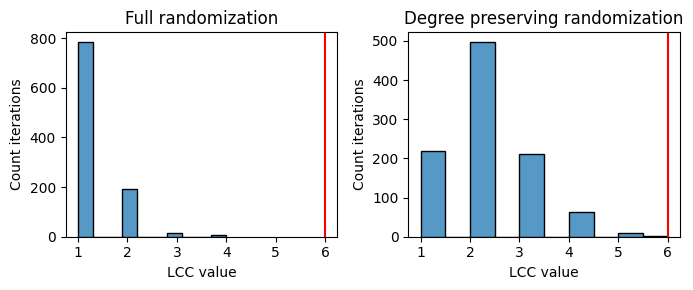

In [35]:
utils.plot_disease_module_info(gppi, dmt)

In [37]:
stzo = utils.get_disease_module_info('schizophrenia', dga, gppi, gppi)

Number of disease genes:  883
Number of disease genes in the PPI:  846
Number of disease genes in the LCC:  683


Full randomization
Mean:  413.42
Std:  34.94400663919351
z-score:  7.714627655136622
p-value:  1.2212453270876722e-14

Degree preserving randomization
Mean:  619.412
Std:  11.27857508730602
z-score:  5.637946239464942
p-value:  1.7209021319075646e-08 



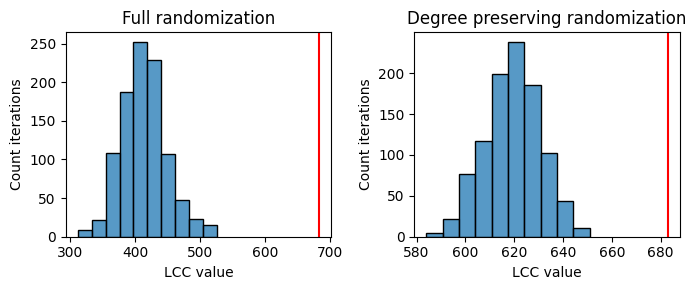

In [38]:
utils.plot_disease_module_info(gppi, stzo)

In [39]:
hchol = utils.get_disease_module_info('hypercholesterolemia', dga, gppi, gppi)

Number of disease genes:  39
Number of disease genes in the PPI:  39
Number of disease genes in the LCC:  19


Full randomization
Mean:  1.998
Std:  1.0899522925339438
z-score:  15.598847872940746
p-value:  0.0

Degree preserving randomization
Mean:  2.24
Std:  0.9275774900244185
z-score:  18.068571284064678
p-value:  0.0 



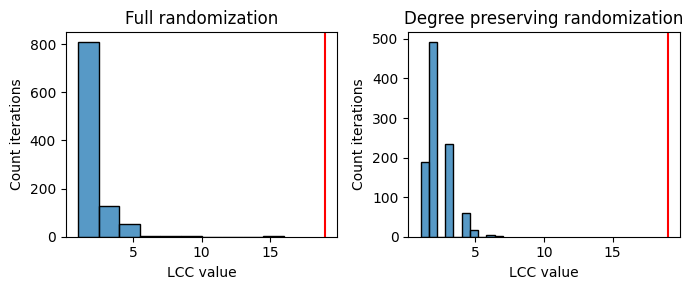

In [40]:
utils.plot_disease_module_info(gppi, hchol)

In [41]:
sab = separation.get_separation(gppi, dmt[2], stzo[2])

In [42]:
print(sab)

1.9245283018867925


In [43]:
sab = separation.get_separation(gppi, dmt[2], hchol[2])

In [44]:
print(sab)

1.84
